Этот проект демонстрирует навыки работы датафреймами, анализом данных, построением графиков и машинным обучением.
Мы будем использовать датафрейм содержащий медицинскую информацию (пол, возраст, боли в груди, давление и прочие) для предсказания наличия у пациента проблем с сердцем.
Задействованы библиотеки numpy, pandas, matplotlib, seaborn и sklearn.

In [1]:
# Импортируем все необходимые в этом проекте библиотеки.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

print('Import complete')

Import complete


In [2]:
# Определим наш набор данных как heart через pandas

heart = pd.read_csv('C:/Users/e.zotkin/ds/project1_health/heart.csv')

In [3]:
# Начнём анализ. Посмотрим сколько в наборе колонок и как они называются.

print('Число колонок равно: ' + str(len(heart.columns)))
heart.columns

Число колонок равно: 14


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age - Возраст
sex - Пол
cp - Тип боли в груди (4 значения)
trestbps - Артериальное давление
chol - Уровень холестерина в крови
fbs - Уровень сахара в крови > 120 mg
restecg - Результаты ЭКГ (значения 0, 1 и 2)
thalach - Значение максимальной частоты пульса
exang - Стенокардия
oldpeak - Результат стресс-теста после физ.нагрузки
slope - Значение наклона ST-участка на кардиограме
ca - количество крупных сосудов (0-3), окрашенных флурозопией
thal - 0 = нормально; 1 = исправленный дефект; 2 = обратимый дефект
target - Наличие или отсутствие проблемы с сердцем (1 или 0)

In [4]:
# Выведем 10 случайных строк из набора:

heart.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1


In [5]:
# Проверим набор на наличие пустых значений. Их не оказалось, двигаемся дальше.

heart.isna().sum().any()

False

In [6]:
# Выведем число уникальных значений каждой колонки.

heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
# Посмотрим какие значения вообще присутствуют в наборе:

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


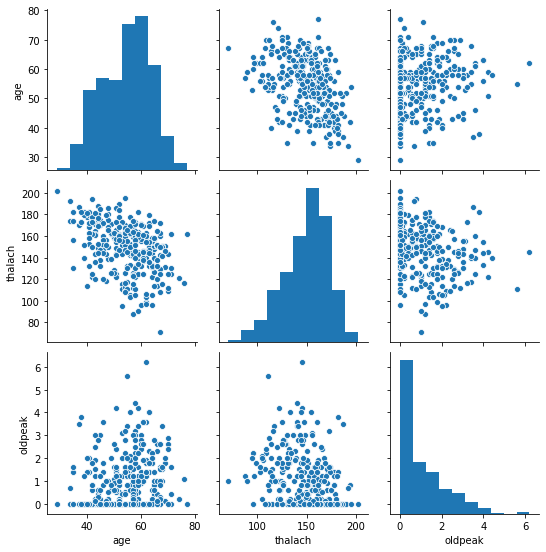

In [8]:
# Визуализируем данные. Посмотрим на совместное распределение нескольких произвольных пар: age, thalach, chol.

sns.pairplot(heart[["age", "thalach", "oldpeak"]], diag_kind="auto")

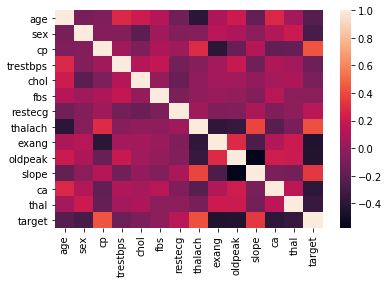

In [9]:
# Построим тепловую карту чтобы посмотреть какие признаки наиболее коррелируют между собой.
# Видим что наибольшее влияние на наличие проблем с сердцем имеют cp и thalach.

corr = heart.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
# Разделим датасет на обучающую и тестовую выборки:

train_heart = heart.sample(frac=0.8,random_state=0)
test_heart = heart.drop(train_heart.index)

In [11]:
# Отделим целевые значения от признаков:

train_labels = train_heart.pop('target')
test_labels = test_heart.pop('target')

In [12]:
# Выше мы увидели что значения уже прошли этап нормировки, нормирования и стандартизации,
# и нам осталось нормализовать данные:

normed_train_heart = (train_heart - train_heart.min()) / (train_heart.max() - train_heart.min())
normed_test_heart = (test_heart - test_heart.min()) / (test_heart.max() - test_heart.min())

normed_train_labels = (train_labels - train_labels.min()) / (train_labels.max() - train_labels.min())
normed_test_labels = (test_labels - test_labels.min()) / (test_labels.max() - test_labels.min())


Logistic Regression Accuracy: 81.97%


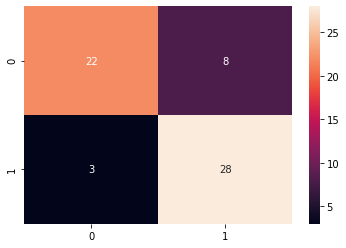

In [13]:
# Начнём обучение с логистической регрессии и отобразим матрицу ошибок

lr_1 = LogisticRegression()
lr_1.fit(normed_train_heart,normed_train_labels)
lr_pred = lr_1.predict(normed_test_heart)

lr_accuracy = accuracy_score(normed_test_labels, lr_pred)
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_accuracy*100))

cm = confusion_matrix(normed_test_labels, lr_pred)
sns.heatmap(cm,annot=True);

Random Forest Classifier Accuracy: 78.69%


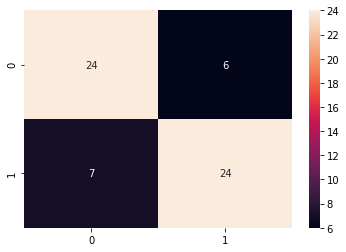

In [14]:
# Алгоритм Случайный лес:

rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)

rfc.fit(normed_train_heart, normed_train_labels)
rfc_pred = rfc.predict(normed_test_heart)
rfc_accuracy = accuracy_score(normed_test_labels, rfc_pred)
 
print('Random Forest Classifier Accuracy: {:.2f}%'.format(rfc_accuracy*100))
cm = confusion_matrix(normed_test_labels, rfc_pred)
sns.heatmap(cm,annot=True);

KNeighborsClassifier Accuracy: 83.61%


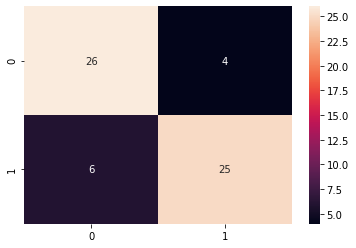

In [15]:
# Метод ближайших К соседей. Оптимальным значением параметра числа соседей в этой задаче оказалось 4:

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(normed_train_heart, normed_train_labels)
knn_pred = knn.predict(normed_test_heart)
knn_accuracy = accuracy_score(normed_test_labels, knn_pred)
print('KNeighborsClassifier Accuracy: {:.2f}%'.format(knn_accuracy*100))

cm = confusion_matrix(normed_test_labels, knn_pred)
sns.heatmap(cm,annot=True);

SVM Accuracy: 85.25%


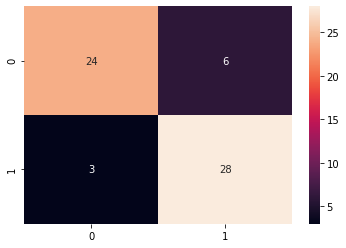

In [17]:
# Метод опорных векторов:

svm = SVC(random_state = 0)
svm.fit(normed_train_heart, normed_train_labels)
svm_pred = svm.predict(normed_test_heart)
svm_accuracy = accuracy_score(normed_test_labels, svm_pred)

print('SVM Accuracy: {:.2f}%'.format(svm_accuracy*100))

cm = confusion_matrix(normed_test_labels, svm_pred)
sns.heatmap(cm,annot=True);

Naive Bayes Accuracy: 77.05%


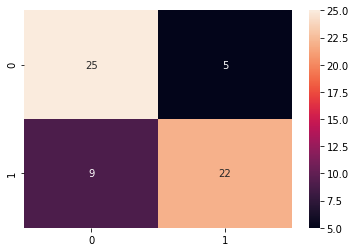

In [18]:
# Метот по теореме Байеса:

nb = GaussianNB()
nb.fit(normed_train_heart, normed_train_labels)
nb_pred = nb.predict(normed_test_heart)
nb_accuracy = accuracy_score(normed_test_labels, nb_pred)

print('Naive Bayes Accuracy: {:.2f}%'.format(nb_accuracy*100))
cm = confusion_matrix(normed_test_labels,nb_pred)
sns.heatmap(cm,annot=True);

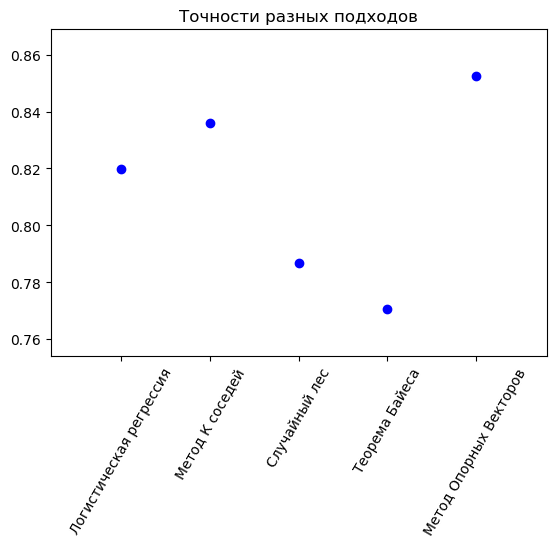

In [56]:
# Отобразим точками точность каждого подхода. Вывод: наилучший результат 85.25% получен с помощью метода опорных векторов.

labels = ['Логистическая регрессия','Метод К соседей','Случайный лес','Теорема Байеса','Метод Опорных Векторов']
x = [1, 2, 3, 4, 5]
plt.plot(x, accuracy, 'bo')
plt.title("Точности разных подходов")
plt.xticks(x, labels, rotation=60)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.2)
plt.show()